Ein Kunde hat eine neue Gebotsmethode eingeführt und die zuvor verwendete maximale Gebotsmethode ersetzt.  
Zur Überprüfung der Konversionsrate der neuen Methode wird ein A/B-Test durchgeführt.  
Der Datensatz enthält die Anzahl der Käufe für beide Methoden.

In [40]:
#!pip install openpyxl
#!pip install statsmodels
#!pip install seaborn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

dataframe_control = pd.read_excel(r"C:\Users\Naime Diler\Desktop\PycharmProjects\2. Measurement Problems\6 week\ABTesti\ab_testing.xlsx", sheet_name="Control Group")
dataframe_test = pd.read_excel(r"C:\Users\Naime Diler\Desktop\PycharmProjects\2. Measurement Problems\6 week\ABTesti\ab_testing.xlsx", sheet_name="Test Group")

df_control = dataframe_control.copy()
df_test = dataframe_test.copy()

In [41]:
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [42]:
df_test.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


## Datenanalyse

In [43]:
def analysis_function(dataframe, target):
    print("####################  Summary of Data   ##############\n")
    print(dataframe.describe().T)
    print("####################  Mean of Target  ############\n")
    print(dataframe[target].mean())
    print("####################  Confidence Interval of Target  #######\n")
    print(sms.DescrStatsW(dataframe[target]).tconfint_mean())
    print("####################  Correlation of The Target with Other Variables  #########\n")
    others = dataframe.drop(target, axis = 1).columns
    for col in others:
        print(f"{col} correlation with {target}")
        print(dataframe[target].corr(dataframe[col]))

In [44]:
analysis_function(df_control, "Purchase")

####################  Summary of Data   ##############

              count         mean         std         min         25%         50%          75%          max
Impression 40.00000 101711.44907 20302.15786 45475.94296 85726.69035 99790.70108 115212.81654 147539.33633
Click      40.00000   5100.65737  1329.98550  2189.75316  4124.30413  5001.22060   5923.80360   7959.12507
Purchase   40.00000    550.89406   134.10820   267.02894   470.09553   531.20631    637.95709    801.79502
Earning    40.00000   1908.56830   302.91778  1253.98952  1685.84720  1975.16052   2119.80278   2497.29522
####################  Mean of Target  ############

550.8940587702316
####################  Confidence Interval of Target  #######

(508.00417525045305, 593.7839422900101)
####################  Correlation of The Target with Other Variables  #########

Impression correlation with Purchase
0.21457493332510497
Click correlation with Purchase
0.05739746000254058
Earning correlation with Purchase
0.06172845453

In [45]:
analysis_function(df_test, "Purchase")

####################  Summary of Data   ##############

              count         mean         std         min          25%          50%          75%          max
Impression 40.00000 120512.41176 18807.44871 79033.83492 112691.97077 119291.30077 132050.57893 158605.92048
Click      40.00000   3967.54976   923.09507  1836.62986   3376.81902   3931.35980   4660.49791   6019.69508
Purchase   40.00000    582.10610   161.15251   311.62952    444.62683    551.35573    699.86236    889.91046
Earning    40.00000   2514.89073   282.73085  1939.61124   2280.53743   2544.66611   2761.54540   3171.48971
####################  Mean of Target  ############

582.1060966484677
####################  Confidence Interval of Target  #######

(530.5670224874668, 633.6451708094685)
####################  Correlation of The Target with Other Variables  #########

Impression correlation with Purchase
0.13779572364901418
Click correlation with Purchase
-0.07441443787151679
Earning correlation with Purchase
0.1

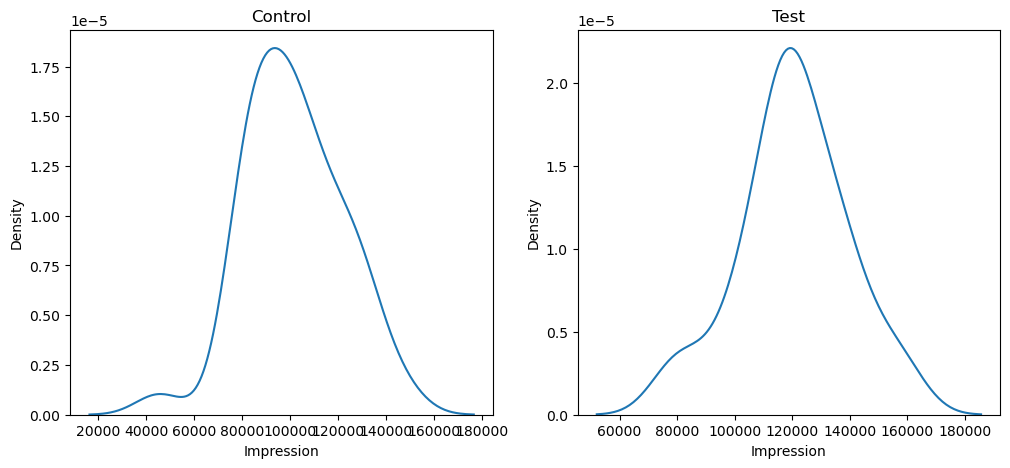

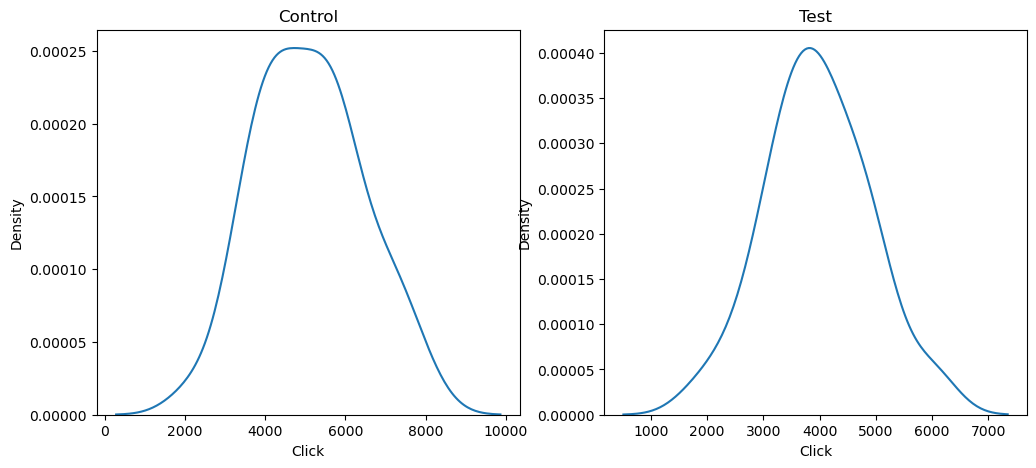

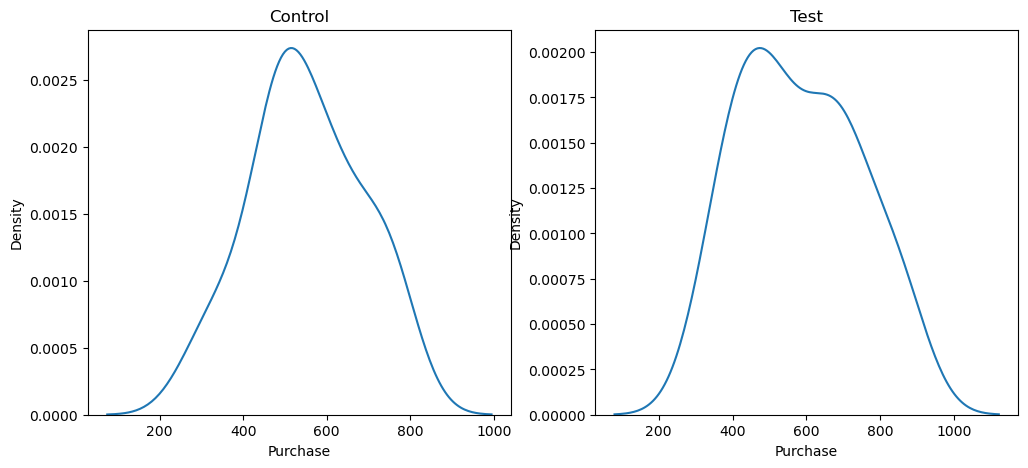

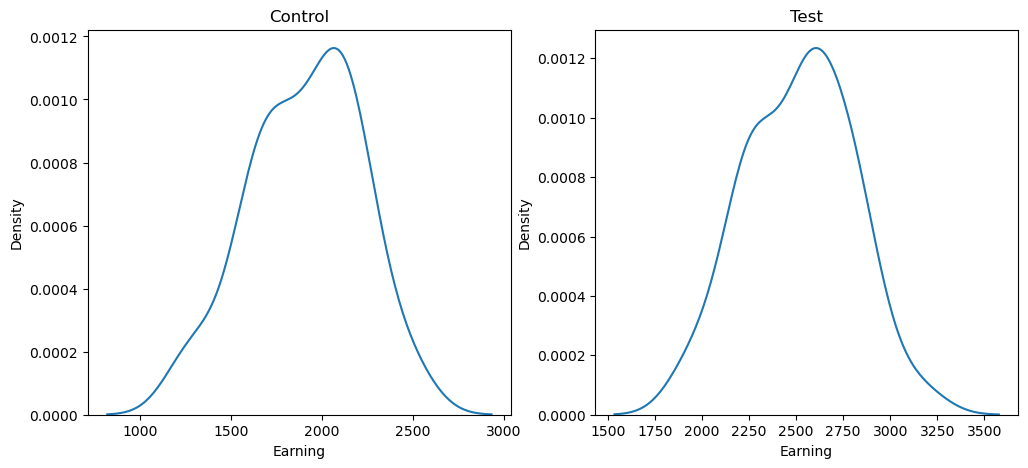

In [46]:
cols = ['Impression', 'Click', 'Purchase', 'Earning']

for col in cols:
    fig, ax = plt.subplots(1, 2)
    fig.set_figheight(5)
    fig.set_figwidth(12)
    
    sns.kdeplot(df_control[col], ax=ax[0], fill=False)
    sns.kdeplot(df_test[col], ax=ax[1], fill=False)
    
    ax[0].set_title('Control')
    ax[1].set_title('Test')
    
    plt.show()

## Feature Engineering

In [47]:
df_control["Conversion_Rate"] = (df_control["Purchase"] / df_control["Click"]) * 100
df_test["Conversion_Rate"] = (df_test["Purchase"] / df_test["Click"]) * 100

df_control["Earning_Per_Purchase"] = (df_control["Earning"] / df_control["Purchase"]) * 100
df_test["Earning_Per_Purchase"] = (df_test["Earning"] / df_test["Purchase"]) * 100

df_control["Group"] = "Control"
df_test["Group"] = "Test"

df = pd.concat([df_control, df_test], ignore_index = True)
df.head()

,Impression,Click,Purchase,Earning,Conversion_Rate,Earning_Per_Purchase,Group
0,82529.45927,6090.07732,665.21125,2311.27714,10.92287,347.45010,Control
1,98050.45193,3382.86179,315.08489,1742.80686,9.31415,553.12295,Control
2,82696.02355,4167.96575,458.08374,1797.82745,10.99058,392.46699,Control
3,109914.40040,4910.88224,487.09077,1696.22918,9.91860,348.23677,Control
4,108457.76263,5987.65581,441.03405,1543.72018,7.36572,350.02290,Control


In [48]:
df.groupby("Group").agg({"Purchase": "mean",
                         "Conversion_Rate": "mean",
                         "Earning_Per_Purchase": "mean"})

,Purchase,Conversion_Rate,Earning_Per_Purchase
Group,,,
Control,550.89406,11.59256,368.80750
Test,582.10610,15.65663,465.29487


## Ausreißer (outlier) Kontrolle

In [49]:
def outlier_detect(dataframe):
    cols = [col for col in dataframe.columns if dataframe[col].dtype != "object"]

    for feature in cols:
        Q1 = dataframe[feature].quantile(0.05)
        Q3 = dataframe[feature].quantile(0.95)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        if dataframe[(dataframe[feature] > upper)].any(axis = None):
            print(feature, "-- it has OUTLIER")
        else:
            print(feature, "-- NO, outlier")


outlier_detect(df)

Impression -- NO, outlier
Click -- NO, outlier
Purchase -- NO, outlier
Earning -- NO, outlier
Conversion_Rate -- NO, outlier
Earning_Per_Purchase -- NO, outlier


## A/B Test

**H0: M1 = M2**  
Es besteht kein statistisch signifikanter Unterschied zwischen dem durchschnittlichen Kaufwert der Kontrollgruppe und der Testgruppe.  

**H1: M1 ≠ M2**  
Es besteht ein statistisch signifikanter Unterschied zwischen dem durchschnittlichen Kaufwert der Kontrollgruppe und der Testgruppe.

In [50]:
def ab_testing(dataframe, target):
    normal = []
    print("#####  Normalitätstest   #####")
    # H0 : Verteilung ist normal
    # H1 : Verteilung ist nicht normal
    for value in list(dataframe["Group"].unique()):
        pvalue = shapiro(dataframe.loc[dataframe["Group"] == value, target])[1]
        normal.append(pvalue)
        print(value, 'Gruppe - p-Wert: %.4f' % pvalue)
    print("#################################")
    if normal[0] > 0.05 and normal[1] > 0.05:
        test_stat, pvalue_var = levene(dataframe.loc[dataframe["Group"] == "Control", target],
                                       dataframe.loc[dataframe["Group"] == "Test", target], )
        print("#####  Varianztest   #####")
        print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue_var))
        print("###############################################")
        if pvalue_var > 0.05:
            print("#####  Homogener parametrischer Test   #####")
            test_stat, pvalue = ttest_ind(dataframe.loc[dataframe["Group"] == "Control", target],
                                          dataframe.loc[dataframe["Group"] == "Test", target],
                                          equal_var = True)

            print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
        else:
            print("#####  Nicht-homogener (Heterogener) parametrischer Test   #####")
            test_stat, pvalue = ttest_ind(dataframe.loc[dataframe["Group"] == "Control", target],
                                          dataframe.loc[dataframe["Group"] == "Test", target],
                                          equal_var = False)

            print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

    else:
        print("#####  Nicht-parametrischer Test   #####")
        test_stat, pvalue = mannwhitneyu(dataframe.loc[dataframe["Group"] == "Control", target],
                                         dataframe.loc[dataframe["Group"] == "Test", target])

        print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

In [51]:
ab_testing(df, "Purchase")

#####  Normalitätstest   #####
Control Gruppe - p-Wert: 0.5891
Test Gruppe - p-Wert: 0.1541
#################################
#####  Varianztest   #####
Test Stat = 2.6393, p-value = 0.1083
###############################################
#####  Homogener parametrischer Test   #####
Test Stat = -0.9416, p-value = 0.3493


In [52]:
ab_testing(df, "Conversion_Rate")

#####  Normalitätstest   #####
Control Gruppe - p-Wert: 0.0003
Test Gruppe - p-Wert: 0.0000
#################################
#####  Nicht-parametrischer Test   #####
Test Stat = 459.0000, p-value = 0.0011


In [53]:
ab_testing(df, "Earning_Per_Purchase")

#####  Normalitätstest   #####
Control Gruppe - p-Wert: 0.0293
Test Gruppe - p-Wert: 0.1872
#################################
#####  Nicht-parametrischer Test   #####
Test Stat = 453.0000, p-value = 0.0009


## Ergebnisse der Hypothesentests für verschiedene Variablen im AB-Test

Shapiro- und Levene-Tests werden zur Überprüfung der Annahmen verwendet.
Im Ergebnis dieser Tests wird der p-Wert für die "Purchase"-Variable mit mehr als 0,05 berechnet.
Daher wird der t-Test für unabhängige Stichproben für den Hypothesentest verwendet.
Die Ergebnisse dieses Tests zeigen, dass die H0-Hypothese nicht abgelehnt wird, da der p-Wert größer als 0,05 ist.
Es gibt also keinen statistisch signifikanten Unterschied zwischen den beiden Gruppen.
Der Kunde kann weiterhin die Methode mit maximalem Gebot verwenden.

Die gleichen Annahmentests werden für die Variablen "Conversion_Rate" und "Earning_Per_Purchase" verwendet.
Im Ergebnis dieser Tests wird der p-Wert für diese Variablen mit weniger als 0,05 berechnet.
Daher wird der Mann-Whitney U-Test, ein nichtparametrischer Test, für den Hypothesentest verwendet.
Die Ergebnisse dieses Tests zeigen, dass die H0-Hypothese abgelehnt wird, da der p-Wert kleiner als 0,05 ist.
Es gibt also einen statistisch signifikanten Unterschied zwischen den beiden Gruppen.
Die Mittelwerte der "Conversion_Rate" und "Earning_Per_Purchase" sind für die Testgruppe größer.
Wir können dem Kunden sagen, dass die Methode mit durchschnittlichem Gebot rentabler ist.